## Simulation & Modeling Techniques
### HW4: Prediction & Analysis

Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sympy
import pint
UNITS = pint.UnitRegistry()
import modsim
from modsim import*


## 0. Preliminary work: Quadratic model

In [2]:
# Read data
tables = pd.read_html('World_population_estimates.html', header=0, index_col=0, decimal="M")
len(tables)

# Get the 3rd element of the tables
table2 = tables[2]

# Replace new columns names
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

# Write data in billion

census = table2.census
un = table2.un

census = census / 1e9
un = un / 1e9

In [3]:
# Calculate elapsed time 

t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_0

# Calculate growth 

p_0 = get_first_value(census)
p_end = get_last_value(census)
total_growth = p_end - p_0

# Annual growth

annual_growth = total_growth / elapsed_time

In [4]:
# Proportional growth

# Define growth rates

alpha = 0.025
beta = 0.0018


# System with alpha and beta

system = System(t_0 = t_0,
                t_end = t_end,
                p_0 = p_0,
                alpha = alpha,
                beta = beta)

In [5]:
# Update function

def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [6]:
# Run simulation function

def run_simulation(system, update_func):
    """Simulate the system using any updtate function
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    
    return results

In [7]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string 
    """
    
    plot(census, ':', label="US Census")
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='green', label='model')
    
    decorate(xlabel='Year',
             ylabel='World population (billion)',
             title=title)
    

## 0.1. Comparing projection 

In [8]:
def read_table3(filename = 'World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['census', 'prb', 'un']
    return table3

In [9]:
table3 = pd.read_csv('World_population_estimates3.csv')
table3.index = table3.Year
table3.head()

,Year,census,prb,un
Year,,,,
2016,2016,7.334772e+09,NaN,7.432663e+09
2017,2017,7.412779e+09,NaN,NaN
2018,2018,7.490428e+09,NaN,NaN
2019,2019,7.567403e+09,NaN,NaN
2020,2020,7.643402e+09,NaN,7.758157e+09


In [10]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), ':', color='C0', label='US Census')
    plot(un_proj.dropna(), '--', color='C1', label='UN DESA')

In [11]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

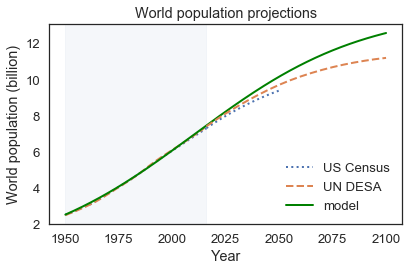

In [12]:
results = run_simulation(system, update_func_quad)

plt.axvspan(1950, 2016, color='C0', alpha=0.05)
plot_results(census, un, results, 'World population projections')
plot_projections(table3)

## 1. Projection

The relative differences in the census and un estimates

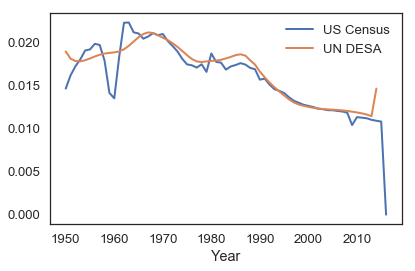

In [13]:
alpha_census = compute_rel_diff(census)
plot(alpha_census, label='US Census')

alpha_un = compute_rel_diff(un)
plot(alpha_un, label='UN DESA')

decorate(xlabel='Year', label='Net growth rate')

Define alpha_func

In [14]:
def alpha_func(t):
    intercept = 0.02
    slope = -0.00023
    return intercept + slope * (t - 1970)

Calling the function

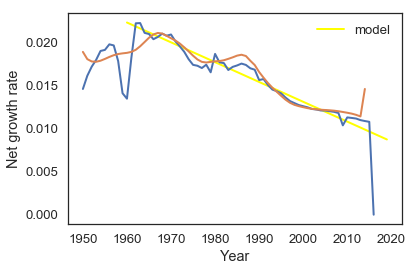

In [15]:
ts = linrange(1960, 2020)
alpha_model = TimeSeries(alpha_func(ts), ts)
plot(alpha_model, color='yellow', label='model')
plot(alpha_census)
plot(alpha_un)

decorate(xlabel='Year', ylabel='Net growth rate')

In [16]:
t_0 = 1960
t_end = 2100
p_0 = census[t_0]

New system object

In [17]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha_func=alpha_func)

Define an update function that uses alpha_func

In [18]:
def update_func_alpha(pop, t, system): 
  
    net_growth = system.alpha_func(t) * pop
    return round (pop + net_growth, 3)

Test your update function with t_0 = 1960 and p_0 = census[t_0]

In [19]:
update_func_alpha(p_0, t_0, system)

3.111

Run a simulation from 1960 to 2100 with your update function, and plot the results.

In [20]:
results = run_simulation(system, update_func_alpha)

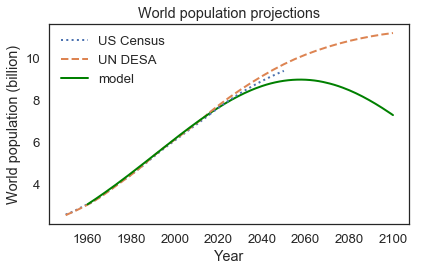

In [21]:
plot_results(census, un, results, 'World population projections')
plot_projections(table3)

## 2. Analysis

### 0. Needed tools and functions

In [22]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from SymPy.
from sympy import *

# Set up Jupyter notebook to display math.
init_printing()

In [23]:
from sympy.printing import latex

def show(expr, show_latex=False):
    """Display a SymPy expression.
    
    expr: SymPy expression
    show_latex: boolean
    """
    if show_latex:
        print(latex(expr))
    return expr

In [24]:
t = symbols('t')

In [25]:
expr = t + 1

In [26]:
type(expr)

sympy.core.add.Add

In [27]:
expr.subs(t, 2)

In [28]:
f = Function('f')

f

In [29]:
type(f)



sympy.core.function.UndefinedFunction

In [30]:
f(t)

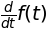

In [31]:
dfdt = diff(f(t), t)

In [32]:
type(dfdt)

sympy.core.function.Derivative

In [33]:
alpha = symbols('alpha')


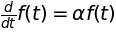

In [34]:
eq1 = Eq(dfdt, alpha*f(t))


In [35]:
solution_eq = dsolve(eq1)

In [36]:
C1, p_0 = symbols('C1 p_0')

In [37]:
particular = solution_eq.subs(C1, p_0)

### 1. Solve the quadratic growth equation using the alternative parameterization

$\frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $

Creating the symbols

In [38]:
alpha, beta = symbols('alpha beta')

The equation...

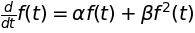

In [39]:
eq3 = Eq(diff(f(t), t), alpha*f(t) + beta*f(t)**2)


Solving the equation...

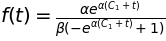

In [40]:
solution_eq = dsolve(eq3)

ODE general solution

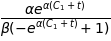

In [41]:
general = solution_eq.rhs

Initial conditions

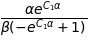

In [42]:
at_0 = general.subs(t, 0)


Finding the constant...

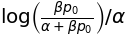

In [43]:
solutions = solve(Eq(at_0, p_0), C1)
C1_value = solutions[0]

Particular solution

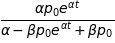

In [44]:
part_sol = general.subs(C1, C1_value)
part_sol.simplify()

### 2. Wolfram alpha solution

Load the image of the solution

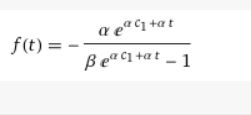

In [45]:
from IPython.display import Image
Image(filename = "data604_pics.JPG", width=200, height=200)